# Лабораторная работа 123

## Резонанс токов в параллельном контуре

In [3]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1], so




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Cхема установки

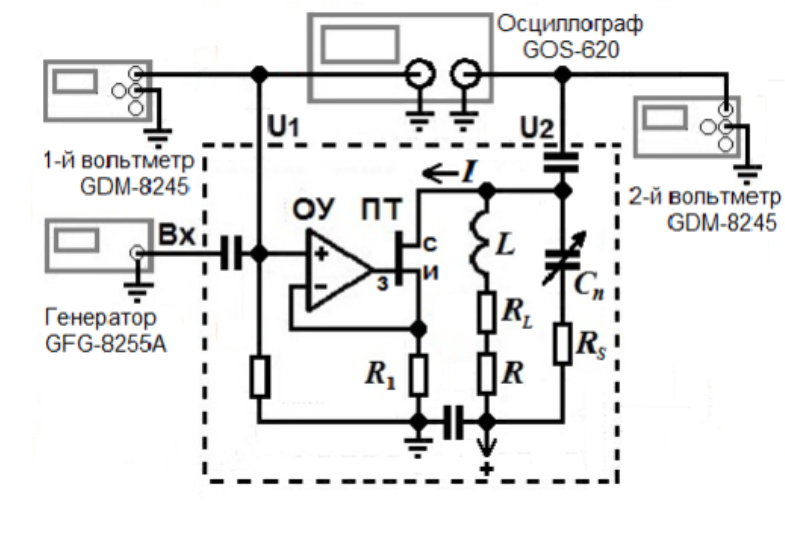

In [4]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/электричество/lab7.png')

### Установка №2, $R=3.5 om;R_1=1008 Om$

In [5]:
R_1=1008
R=3.5
C_n=np.array([25.1,33.2,47.3,57.4,67.5,82.7,101.6])
f_0n=np.array([32.290,28.042,23.543,21.383,19.688,17.815,16.066])
U=np.array([1.56,1.21,0.88,0.74,0.64,0.527,0.435])
E=np.array([0.301 for i in range(0,7)])
L=np.array([1.0 for i in range(0,7)])/4/3.14**2/(f_0n*10**3)/(f_0n*10**3)/(C_n*10**(-9))*10**(6)
rho=(L*10**(-6)/(C_n*10**(-9)))**0.5
Z_res=U/E*1008
Q=Z_res/rho
R_sum=rho/Q
R_S=10**(-3)*rho
R_L=R_sum-R-R_S

In [6]:

table={f'$C_n$, нФ':C_n,f'$f_0$, кГц':f_0n.round(3),'U, B':U,'E,B':E,
       'L,мкГн':L.round(0).astype(np.int64),f'$rho$,Ом':rho.round(0).astype(np.int64),f'$Z_r$, Ом':(Z_res.round(-1)).astype(np.int64),"Q":Q.round(1),f'$R_∑$,Ом':R_sum.round(2),f'$R_S$ max, Ом':R_S.round(3),f'$R_L$,Ом':R_L.round(2)}
fr=pd.DataFrame(table)
fr

,"$C_n$, нФ","$R_L$,Ом","$R_S$ max, Ом","$R_∑$,Ом","$Z_r$, Ом","$f_0$, кГц","$rho$,Ом","E,B","L,мкГн",Q,"U, B"
0,25.1,3.69,0.196,7.39,5220,32.290,196,0.301,969,26.6,1.560
1,33.2,3.55,0.171,7.22,4050,28.042,171,0.301,971,23.7,1.210
2,47.3,3.30,0.143,6.94,2950,23.543,143,0.301,967,20.6,0.880
3,57.4,3.16,0.130,6.79,2480,21.383,130,0.301,966,19.1,0.740
4,67.5,3.08,0.120,6.70,2140,19.688,120,0.301,969,17.9,0.640
5,82.7,3.01,0.108,6.62,1760,17.815,108,0.301,966,16.3,0.527
6,101.6,2.94,0.098,6.53,1460,16.066,98,0.301,967,14.9,0.435


### $L=\frac{1}{4\pi^2f_0^2C_n}$

### $\rho=\sqrt{\frac{L}{C}}$

### $Z_{res}=U(\omega_0)/I_0=Q\rho$

### $Q=\frac{\rho}{R_{sum}}=\frac{1}{\omega_0CR_{sum}}=\frac{Z_{res}}{\rho}$

### $R_{sum}=R_L+R+R_S=\frac{\rho}{Q}$

### $R_S=\frac{tg \delta}{\omega C}=10^{-3}\rho$

### $R_L=R_{sum}-R-R_S$

### $\Delta L=\frac{2\Delta f_{0n}}{f_{0n}}+\frac{\Delta C_n}{C_n}$

### $\Delta R_L=\frac{\Delta R_{sum}}{R_{sum}}+\frac{\Delta R}{R}+\frac{\Delta R_S}{R_S}=3(\frac{\Delta L}{2L}+\frac{\Delta C_n}{2C_n})+\frac{\Delta Z_{res}}{Z_{res}}+\frac{\Delta R}{R}$

### $\Delta Z_{res}=\frac{\Delta U}{U}+\frac{\Delta I_0}{I_0}$

In [7]:
d_L=(2*0.01+0.005)*L
d_R_L=(3*d_L/L/2+0.005+0.02/U+5/R_1+0.03/3.5)*R_L
qw=pd.DataFrame({'∆L,мкГн':d_L.round(0).astype(np.int64),f'$∆R_L$,Ом':d_R_L.round(2)})
qw

,"$∆R_L$,Ом","∆L,мкГн"
0,0.25,24
1,0.26,24
2,0.26,24
3,0.26,24
4,0.27,24
5,0.28,24
6,0.30,24


### Оценим вклад потерь в конденсаторах в суммарное активное сопротивление контура вблизирезонанса равный $\rho tg \delta$. Для этого найдем отношение $\frac{R_S}{R_{sum}}$

In [8]:
R_S_div_R_sum=R_S/R_sum
pd.DataFrame({f'R_S/R_m':R_S_div_R_sum.round(3)})

,R_S/R_m
0,0.027
1,0.024
2,0.021
3,0.019
4,0.018
5,0.016
6,0.015


### По результатам эксперимента видно, что вклад потерь от конденсатора незначителен

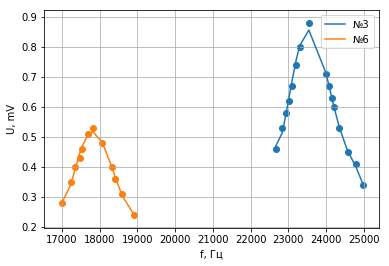

In [25]:
U_3 = np.array([0.46, 0.53,0.58,0.62,0.67,0.74, 0.80,0.88,0.71,0.67, 0.63,0.60,0.53,0.45, 0.41, 0.34])
f_3 = np.array([22670,22834,22925,23008,23092,23215,23302,23543,23997,24071,24150,24208,24352,24568,24789,24973])
f_6 = np.array([17010,17234,17360,17467,17534,17695,17815,18070,18316,18411,18600,18911])
U_6 = np.array([0.28,0.35,0.40,0.43,0.46,0.51,0.53,0.48,0.40,0.36,0.31,0.24])

a,b,c,d,e,f = sp.polyfit(f_3, U_3, 5)
y1 = f_3*(a*f_3**4 + b*f_3**3 + c*f_3**2 + d*f_3+e)+f
plt.plot(f_3, y1, label = "№3")
plt.xlabel("f, Гц")
plt.ylabel("U, mV")
plt.grid(True)
plt.scatter(f_3, U_3)
a,b,c,d,e,f = sp.polyfit(f_6, U_6, 5)
y2 = f_6*(a*f_6**4 + b*f_6**3 + c*f_6**2 + d*f_6+e)+f
plt.plot(f_6, y2, label = "№6")
plt.scatter(f_6, U_6)
plt.legend()

### Видим, что резонансная частота при $C_3$ больше, чем при $C_6$, что подтверждается формулами. Также, из графика видно, что при $ C = C_6$ кривая имеет более острый вид. Можно сделать вывод, что добротность этого контура выше, что тоже согласуется с формулами.

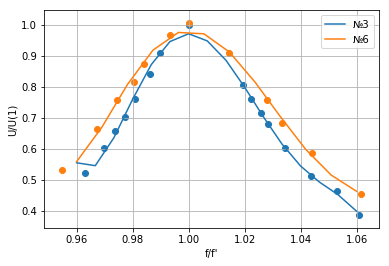

In [26]:
U_3 = U_3/0.88
f_3 = f_3/23543
U_6 = U_6/0.527
f_6 = f_6/17815

x1 = np.linspace(0.96,1.06,16)
x2 = np.linspace(0.96,1.06,12)
a,b,c,d,e,f = sp.polyfit(f_3, U_3, 5)
y1 = x1*(a*x1**4 + b*x1**3 + c*x1**2 + d*x1+e)+f
plt.plot(x1, y1, label = "№3")
plt.xlabel("f/f'")
plt.ylabel("U/U(1)")
plt.grid(True)
plt.scatter(f_3, U_3)
a,b,c,d,e,f = sp.polyfit(f_6, U_6, 5)
y2 = x2*(a*x2**4 + b*x2**3 + c*x2**2 + d*x2+e)+f
plt.plot(x2, y2, label = "№6")
plt.scatter(f_6, U_6)
plt.legend()

# Найдем интервал $2\delta$, на котором напряжение падает до  $0.7 U_0$. 

$$2\frac{\delta_3}{\omega_3} = 1.025 - 0.976; \delta (2\frac{\delta_3}{\omega_3}) = 0.004$$

$$2\frac{\delta_6}{\omega_6} = 1.032 - 0.97; \delta (2\frac{\delta_6}{\omega_6}) = 0.006$$

$$ Q_3 = \frac{\omega_3}{2\delta_3} =  20.4$$

$$ Q_6 = \frac{\omega_6}{2\delta_6} =  16.1$$

$$ \delta Q = Q \frac{\delta \frac{\delta_x}{\omega_x}}{\frac{\delta_x}{\omega_x}} $$

$$ Q_3 = 20 \pm 2, Q_6 = 16 \pm 2 $$




In [11]:
f3 = np.array([21700, 22130,22282,22578,22710,22813,23040,23128,23365,23990,24055,24250,24413,24717,25340])
phi3 = np.array([1-2.7/4.8,1-2.8/4.5,1-2.9/4.45,1-2.95/4.4,1-3/4.4,1-3.1/4.4,1-3.3/4.3,1-3.4/4.3,1-3.8/4.3,0.9/4.15,1/4.15,1.2/4.1,1.35/4.05,1.5/4,1.7/3.9])
f6 = np.array([16692,16982,17080,17313,17530,17708,18090,18234,18754,19145,19357])
phi6 = np.array([1-3.85/5.95,1-4/5.85,1-4.1/5.8, 1-4.4/5.7, 1-4.8/5.65,1-5.15/5.6,0.85/5.45,1.2/5.4,1.85/5.25,2.1/5.15,2.2/5.1])

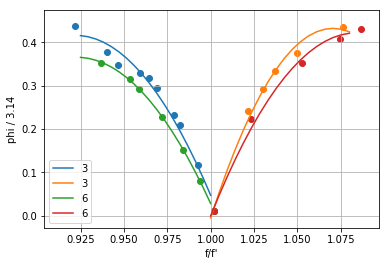

In [12]:
f3 = f3/23543
f6 = f6/17815

f3_1 = np.append(f3[:9], 1.002)
f3_2 = np.append(np.array([]), 1.002)
f3_2 = np.append(f3_2, f3[10:])
phi3_1 = np.append(phi3[:9], 0.01)
phi3_2 = np.append(np.array([]), 0.01)
phi3_2 = np.append(phi3_2, phi3[10:])
plt.scatter(f3_1, phi3_1)
plt.scatter(f3_2, phi3_2)

f6_1 = np.append(f6[:6], 1.002)
f6_2 = np.append(np.array([]), 1.002)
f6_2 = np.append(f6_2, f6[7:])
phi6_1 = np.append(phi6[:6], 0.01)
phi6_2 = np.append(np.array([]), 0.01)
phi6_2 = np.append(phi6_2, phi6[7:])
plt.scatter(f6_1, phi6_1)
plt.scatter(f6_2, phi6_2)

x1 = np.linspace(0.925,1,18)
x2 = np.linspace(1,1.080,18)
a,b,c = sp.polyfit(f3_1, phi3_1, 2)
phi3_1 = a*x1**2 + b*x1 + c

a,b,c = sp.polyfit(f3_2, phi3_2, 2)
phi3_2 = a*x2**2 + b*x2 + c

a,b,c = sp.polyfit(f6_1, phi6_1, 2)
phi6_1 = a*x1**2 + b*x1 + c

a,b,c = sp.polyfit(f6_2, phi6_2, 2)
phi6_2 = a*x2**2 + b*x2 + c

plt.xlabel("f/f'")
plt.ylabel(f"phi / 3.14")

plt.plot(x1, phi3_1, label = "3")
plt.plot(x2, phi3_2, label = "3")
plt.plot(x1, phi6_1, label = "6")
plt.plot(x2, phi6_2, label = "6")
plt.legend()
plt.grid(True)

### Теперь определим добротность другим способом : 

$$Q = \frac{1}{\Delta (f/f_0)}$$

$$ \Delta_3(f/f_0) =  1.028 - 0.972; \delta (\Delta_3(f/f_0)) = 0.006 $$

$$ \Delta_6(f/f_0) =  1.032 - 0.962; \delta (\Delta_6(f/f_0)) = 0.008 $$

$$ Q_3 = 17.9, Q_6 = 14.3$$

$$ \delta (Q_x) = Q_x \frac{\delta \Delta_x (f/f_0)}{\Delta_x (f/f_0)} $$

$$ Q_3 = 18 \pm 2; Q_6 = 14 \pm 2 $$

### Таким образом, добротности совпадают с теоритическими расчетами с точностью до погрешности.

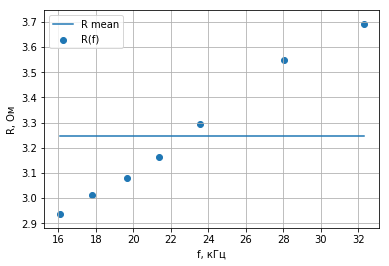

In [27]:
R_mean = np.mean(R_L)
R_mean = np.repeat(R_mean, len(R_L))
R_L1 = np.append(R_L, 0)
f_0n1 = np.append(f_0n, 0.6*f_0n[-1])
#plt.plot(f_0n1, R_L1)
plt.scatter(f_0n, R_L, label = "R(f)")
plt.plot(f_0n, R_mean, label = "R mean")
plt.xlabel("f, кГц")
plt.ylabel("R, Ом")
plt.grid(True)
plt.legend()

### Векторная диаграмма для токов и напряжений для контура с наименьшей добротностью

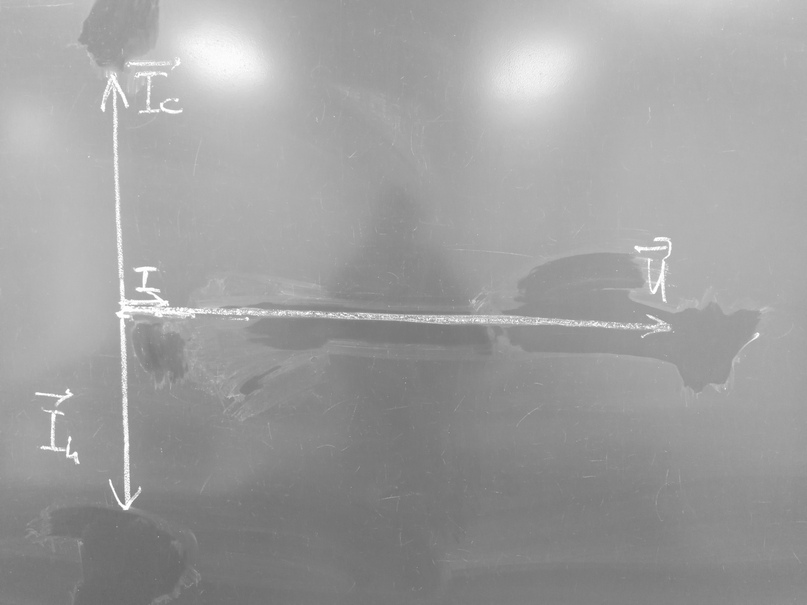

In [14]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/электричество/lab7_1.jpg')